In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:
# from autonotebook import tqdm as notebook_tqdm

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda


settings = Settings()
settings.replicates = 1
settings.gamma_range = (1,8)
settings.train_frac = 0.5
settings.times = [0.0, 0.5, 5.0]
settings.RW_exponent = [0]
settings.HDXer_stride = 1 # this must be smaller than the size of trajectory
settings.RW_do_reweighting = False
settings.RW_do_params = True
settings.save_figs = False
settings.stride = 1000
reps = 5

expt_dir = "/home/alexi/Documents/ValDX/raw_data/HOIP/dab3"

HOIP_dir = "/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3"




reps_list = [os.path.join(HOIP_dir, f"R_{i}") for i in range(1, reps+1)]

print(reps_list)


traj_names = ["APO_dab3_6SC6_1-nojump.xtc"]

reordered_traj_names = ["APO_dab3_6SC6_1-nojump_reordered.xtc"]

sim_name = "HOIP_dab3_APO"
top_name = "APO_dab3_6SC6_1-nojump.pdb"
reordered_top_name = "APO_dab3_6SC6_1-nojump_reordered.pdb"

top_path = os.path.join(HOIP_dir, top_name)





import pickle

expt_name = 'Experimental'
test_name = "HOIPdab3"


/home/alexi/Documents/ValDX


['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5']


In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
def preprocess_main_HDX():

    raw_csv = os.path.join("raw_data", "HOIP","dab3","dab3_3_excel.csv")

    raw_df = pd.read_csv(raw_csv)
    # remove multilevel columns
    # print(raw_df.head())

    # select state dab3
    dab3_df = raw_df[raw_df['State'] == 'dAb3_3']


    # add 697 to Start and End  
    dab3_df['Start'] = dab3_df['Start'] 
    dab3_df['End'] = dab3_df['End']

    # add UptakeFraction column
    dab3_df['UptakeFraction'] = dab3_df['Uptake'] / dab3_df['MaxUptake']
    dab3_df.tail()

    columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]
    dab3_df = dab3_df.drop(columns_to_drop, axis=1)
    dab3_df.head()
    dab3_df= dab3_df.drop(columns=['Unnamed: 1','Unnamed: 2'])
    dab3_df.head()


    # pivot exposure and uptake fraction
    dab3_df = dab3_df.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

    dab3_df.head()


    # remove End > 1072
    dab3_df = dab3_df.loc[dab3_df['End'] <= 1072-697]
    dab3_df.head()

    dab3_df = dab3_df.pivot(index=['Start','End'], columns='Exposure', values='UptakeFraction')



    # print entire dataframe
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    print(dab3_df)

    # fill in missing

    dab3_df.reset_index(inplace=True)

    # Forward fill the 'Start' column
    dab3_df['Start'] = dab3_df['Start'].ffill()

    # Set 'Start' and 'End' back as the index if needed
    dab3_df.set_index(['Start', 'End'], inplace=True)

    # save with space delimiter
    # round to 5 dp

    dab3_df = dab3_df.round(5)
    dab3_df.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_dab3_dfs.csv'), sep=' ')





    dab3_df.to_csv(os.path.join("raw_data", "HOIP", "dab3.csv"), index=False)

    # select only Start and End
    dab3_df.reset_index(inplace=True)

    dab3_segs = dab3_df[['Start', 'End']]
    # dab3_segs.drop(columns=["Exposure"])

    dab3_segs.head()


    os.listdir(expt_dir)

    segs_name = "HOIP_dab3_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "HOIP_dab3_dfs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_HOIPdab3_1Intrinsic_rates.dat" #need to correct this
    rates_path =os.path.join(expt_dir, rates_name)


    segs = [(1, 7),
    (6, 18),
    (6, 21),
    (6, 25),
    (7, 18),
    (7, 21),
    (7, 25),
    (8, 18),
    (8, 20),
    (8, 21),
    (8, 24),
    (11, 18),
    (11, 20),
    (11, 21),
    (11, 23),
    (11, 25),
    (19, 25),
    (26, 32),
    (26, 33),
    (27, 33),
    (33, 40),
    (34, 40),
    (34, 41),
    (41, 48),
    (41, 49),
    (41, 51),
    (42, 49),
    (42, 51),
    (42, 65),
    (49, 61),
    (49, 65),
    (50, 65),
    (52, 61),
    (52, 65),
    (74, 84),
    (76, 84),
    (77, 84),
    (77, 85),
    (77, 87),
    (77, 88),
    (77, 97),
    (85, 97),
    (86, 97),
    (88, 97),
    (89, 97),
    (98, 104),
    (98, 106),
    (98, 108),
    (113, 120),
    (114, 120),
    (117, 131),
    (121, 131),
    (121, 132),
    (132, 149),
    (132, 150),
    (132, 153),
    (150, 169),
    (151, 162),
    (151, 167),
    (151, 169),
    (151, 170),
    (154, 169),
    (155, 169),
    (169, 183),
    (170, 183),
    (170, 185),
    (170, 186),
    (171, 183),
    (171, 186),
    (184, 195),
    (184, 208),
    (187, 195),
    (187, 208),
    (187, 209),
    (188, 208),
    (194, 208),
    (196, 208),
    (213, 223),
    (224, 238),
    (224, 239),
    (247, 257),
    (247, 259),
    (247, 260),
    (248, 257),
    (248, 259),
    (248, 260),
    (250, 257),
    (250, 260),
    (253, 260),
    (261, 275),
    (261, 276),
    (261, 278),
    (261, 281),
    (305, 313),
    (305, 315),
    (308, 315),
    (314, 327),
    (316, 327),
    (317, 327),
    (333, 356),
    (334, 356),
    (334, 357),
    (336, 356),
    (336, 357),
    (336, 360),
    (338, 360),
    (339, 360),
    (342, 360)]


    # save as tabbed txt file between each column
    with open(segs_path, 'w') as f:
        for seg in segs:
            f.write("%s\t%s\n" % seg)

    return segs_path, hdx_path, rates_path






In [6]:
def preprocess_main_MD():

    # test reordering 
    # HOIP Chain B resi 697-1072
    # dab3 Chain A C resi 1-120

    top_test = mda.Universe(top_path)
    print(top_test.atoms)

    HOIP_selection = "protein and segid B and resid 697:1072"
    dab3_selection1 = "protein and segid A and resid 1:120"
    dab3_selection2 = "protein and segid C and resid 1:120"

    HOIP = top_test.select_atoms(HOIP_selection)
    # set to Chain A
    # for atom in HOIP:
    #     atom.segment.segid = "A"
        # set chain to A
    dab3_1 = top_test.select_atoms(dab3_selection1)
    # for atom in dab3_1:
    #     atom.segment.segid = "B"
    dab3_2 = top_test.select_atoms(dab3_selection2)
    # for atom in dab3_2:
    #     atom.segment.segid = "C"

    new_order = HOIP + dab3_1 + dab3_2

    print(new_order)

    new_order_universe = mda.Merge(new_order)
    # # renumber residues
    # for idx, res in enumerate(new_order_universe.residues):
    #     res.resid = idx + 1

    print(new_order_universe.atoms)



    # save pdb
    reordered_top_path = os.path.join(HOIP_dir, reordered_top_name)
    new_order_universe.atoms.write(reordered_top_path)


    # re number residues with pdb-tools
    renumbered_path = os.path.join(HOIP_dir, "renumbered.pdb")
    !pdb_reres -1 {reordered_top_path} > {renumbered_path}


    # read in reordered pdb as text
    with open(reordered_top_path, 'r') as f:
        reordered_pdb = f.readlines()

        new_lines = []
        for line in reordered_pdb:
            # print(line)
            split = line.split()
            if "ATOM" == split[0]:
                print(line)
                print(line[21])
                print(line[72])
                # replace index 21 with 72
                line = line[:21] + line[72] + line[22:]
                # break

            new_lines.append(line)

    # with open(reordered_top_path, 'w') as f:
    #     f.writelines(new_lines)
            
        
    #traj_paths is a list of every combination of rep_paths and traj_names

    traj_paths = []
    for rep_path in reps_list:
        for traj_name in traj_names:
            path = os.path.join(rep_path, traj_name)
            print(path)
            traj_paths.append(path)

    # print(top_path)

    # test reordering 
    # HOIP Chain B resi 697-1072
    # dab3 Chain A C resi 1-120

    top_test = mda.Universe(top_path, traj_paths)
    print(len(top_test.trajectory))
    print(top_test.atoms)

    HOIP_selection = "protein and segid B and resid 697:1072"
    dab3_selection1 = "protein and segid A and resid 1:120"
    dab3_selection2 = "protein and segid C and resid 1:120"

    HOIP = top_test.select_atoms(HOIP_selection)
    # set to Chain A
    # for atom in HOIP:
    #     atom.segment.segid = "A"
        # set chain to A
    dab3_1 = top_test.select_atoms(dab3_selection1)
    # for atom in dab3_1:
    #     atom.segment.segid = "B"
    dab3_2 = top_test.select_atoms(dab3_selection2)
    # for atom in dab3_2:
    #     atom.segment.segid = "C"

    new_order = HOIP + dab3_1 + dab3_2

    print(new_order)

    new_order_universe = mda.Merge(new_order)
    print(len(new_order_universe.trajectory))

    # Renumber residues if needed
    # new_resid = 1
    # for residue in new_order_universe.residues:
    #     residue.resid = new_resid
    #     new_resid += 1

    print(new_order_universe.atoms)
    # new_order_universe.atoms.write("test.pdb")

    # Prepare to write the new trajectory
    new_traj_path = os.path.join(HOIP_dir, reordered_traj_names[0])
    with mda.Writer(new_traj_path, new_order_universe.atoms.n_atoms) as W:
        for ts in top_test.trajectory[::settings.stride]:
            # Update positions of the new universe to match the current timestep
            new_order_universe.atoms.positions = top_test.atoms.positions
            # Write the timestep to the new trajectory
            W.write(new_order_universe)
            W.write(new_order_universe)
            break



    return new_traj_path, renumbered_path


In [7]:

def run_split_test(split_mode, name, system):

    settings.split_mode = split_mode
    settings.name = "_".join([name, system])

    VDX = ValDXer(settings)


    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=renumbered_path, traj_paths=[new_traj_path], calc_name=test_name)
    # VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

Exposure   0.0       0.5       5.0
Start End                         
1     7    0.0  0.466735  0.435965
6     18   0.0  0.329021  0.417331
      21   0.0  0.437678  0.514648
      25   0.0  0.494072  0.550188
7     18   0.0  0.409742  0.499738
      21   0.0  0.465488  0.532689
      25   0.0  0.518648  0.575634
8     18   0.0  0.428948  0.505906
      20   0.0  0.487081  0.544802
      21   0.0  0.490184  0.554119
      24   0.0  0.522236  0.584780
11    18   0.0  0.490079  0.531893
      20   0.0  0.543597  0.572614
      21   0.0  0.548075  0.583051
      23   0.0  0.603121  0.626074
      25   0.0  0.575935  0.598220
19    25   0.0  0.560898  0.587244
26    32   0.0  0.162769  0.272038
      33   0.0  0.163224  0.282758
27    33   0.0  0.159595  0.267070
33    40   0.0  0.309840  0.407468
34    40   0.0  0.325881  0.412225
      41   0.0  0.317411  0.423762
41    48   0.0  0.381343  0.389136
      49   0.0  0.356548  0.373868
      51   0.0  0.351628  0.404541
42    49   0.0  0.29

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


ATOM      1  N   GLN B 697      51.060  62.190  16.390  1.00  0.00      B    N  

B
B
ATOM      2  H1  GLN B 697      50.300  61.600  16.080  1.00  0.00      B    H  

B
B
ATOM      3  H2  GLN B 697      51.510  61.750  17.180  1.00  0.00      B    H  

B
B
ATOM      4  H3  GLN B 697      50.690  63.080  16.690  1.00  0.00      B    H  

B
B
ATOM      5  CA  GLN B 697      52.010  62.390  15.280  1.00  0.00      B    C  

B
B
ATOM      6  HA  GLN B 697      51.470  62.880  14.470  1.00  0.00      B    H  

B
B
ATOM      7  CB  GLN B 697      53.180  63.320  15.650  1.00  0.00      B    C  

B
B
ATOM      8  HB1 GLN B 697      52.780  64.320  15.810  1.00  0.00      B    H  

B
B
ATOM      9  HB2 GLN B 697      53.820  63.380  14.770  1.00  0.00      B    H  

B
B
ATOM     10  CG  GLN B 697      54.040  62.970  16.880  1.00  0.00      B    C  

B
B
ATOM     11  HG1 GLN B 697      54.010  61.900  17.100  1.00  0.00      B    H  

B
B
ATOM     12  HG2 GLN B 697      53.650  63.480  17.760

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/APO_dab3_6SC6_1-nojump_reordered.xtc -p /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/calc_hdx_train_HOIPdab3_1.log -out /home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1 -seg /home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt -mopt "{ 'save_detailed' : True }" --times 0.0 0.5 5.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
HOIP_dab3 HOIPdab3 True 1
/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1
/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat
REWIGHTING train_HOIPdab3_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/random_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat', 'times': [0.0, 0.5, 5.0], 'restart_interval': 100, 'out_p

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Recalculating val_HOIPdab3_1
    ResStr  ResEnd  peptide                                               path
0        6      18        1  /home/alexi/Documents/ValDX/data/random_HOIPda...
1        6      21        2  /home/alexi/Documents/ValDX/data/random_HOIPda...
2        6      25        3  /home/alexi/Documents/ValDX/data/random_HOIPda...
3        7      25        6  /home/alexi/Documents/ValDX/data/random_HOIPda...
4        8      20        8  /home/alexi/Documents/ValDX/data/random_HOIPda...
5       11      21       13  /home/alexi/Documents/ValDX/data/random_HOIPda...
6       11      23       14  /home/alexi/Documents/ValDX/data/random_HOIPda...
7       26      32       17  /home/alexi/Documents/ValDX/data/random_HOIPda...
8       33      40       20  /home/alexi/Documents/ValDX/data/random_HOIPda...
9       34      40       21  /home/alexi/Documents/ValDX/data/random_HOIPda...
10      41      48       23  /home/alexi/Documents/ValDX/data/random_HOIPda...
11      41      49     

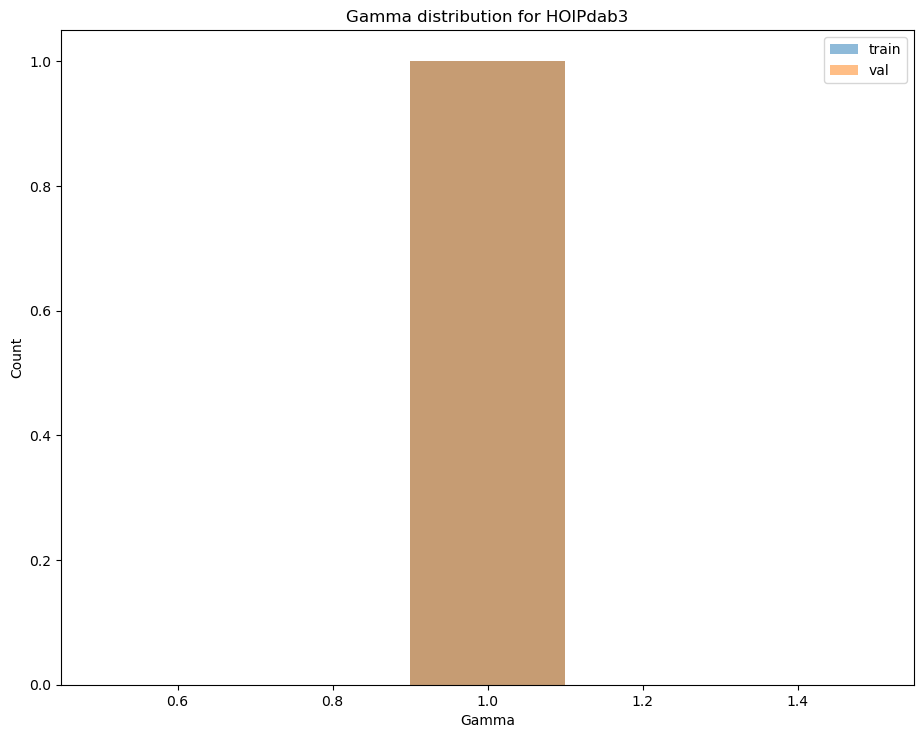

['train_HOIPdab3_1']
['val_HOIPdab3_1']
plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11   

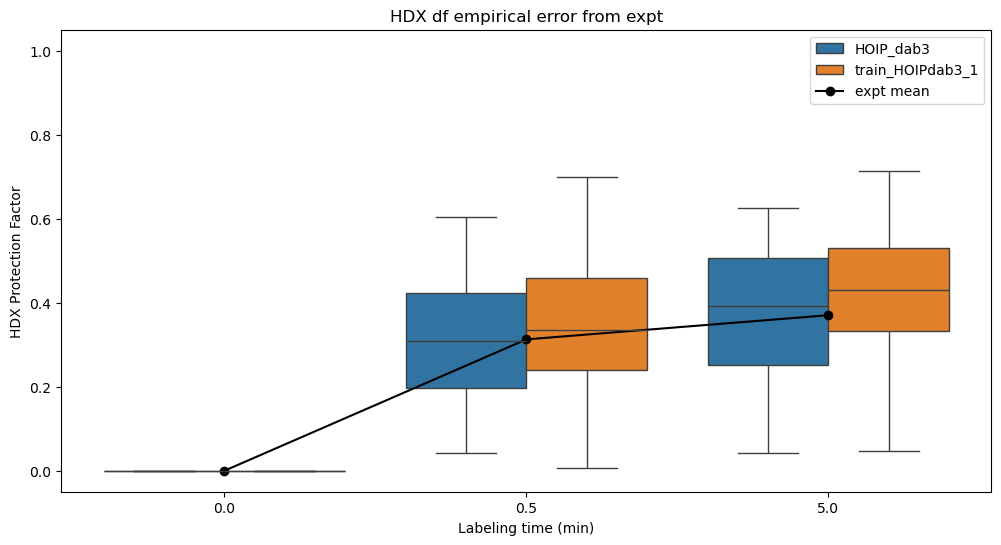

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

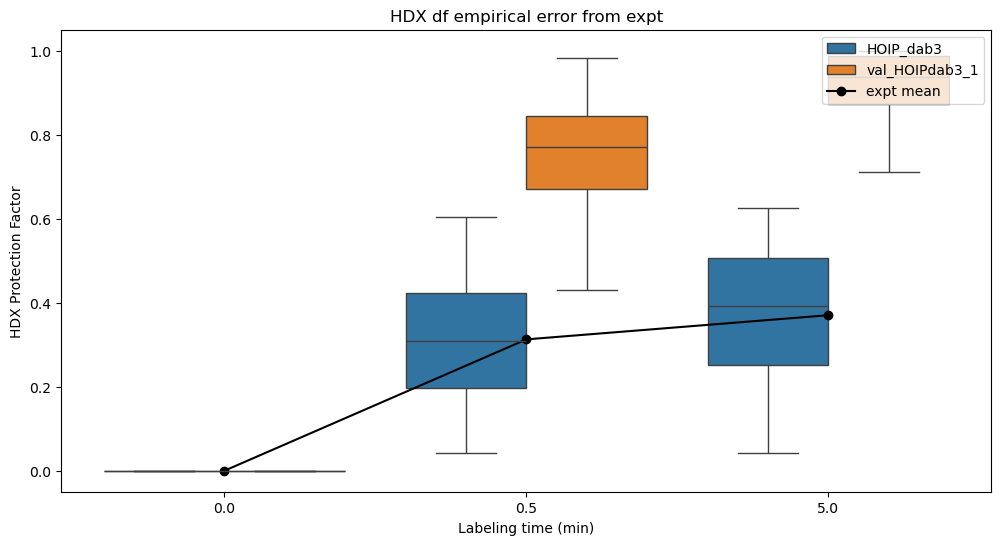

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

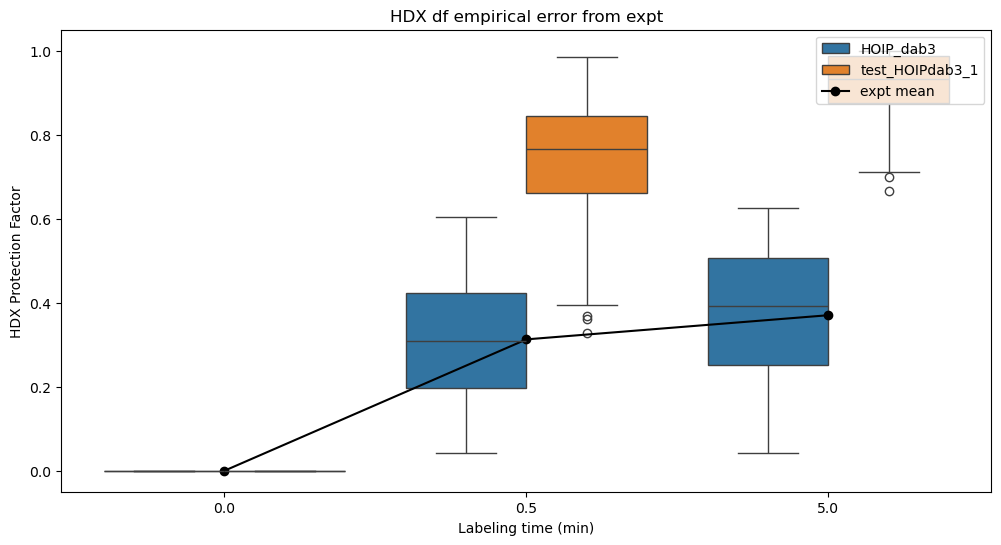

train_rep_names ['train_HOIPdab3_1']
val_rep_names ['val_HOIPdab3_1']
test_rep_names ['test_HOIPdab3_1']
train_rep_peptides [77, 10, 4, 83, 62, 67, 30, 45, 95, 11, 81, 79, 0, 80, 18, 69, 56, 76, 106, 42, 12, 36, 64, 26, 22, 31, 47, 100, 15, 44, 88, 89, 9, 33, 55, 103, 28, 40, 5, 53, 107, 39, 35, 16, 78, 34, 66, 7, 43, 65, 72, 27, 19, 90]
val_rep_peptides [1, 2, 3, 6, 8, 13, 14, 17, 20, 21, 23, 24, 25, 29, 32, 37, 38, 41, 46, 48, 49, 50, 51, 52, 54, 57, 58, 59, 60, 61, 63, 68, 70, 71, 73, 74, 75, 82, 84, 85, 86, 87, 91, 92, 93, 94, 96, 97, 98, 99, 101, 102, 104, 105]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103

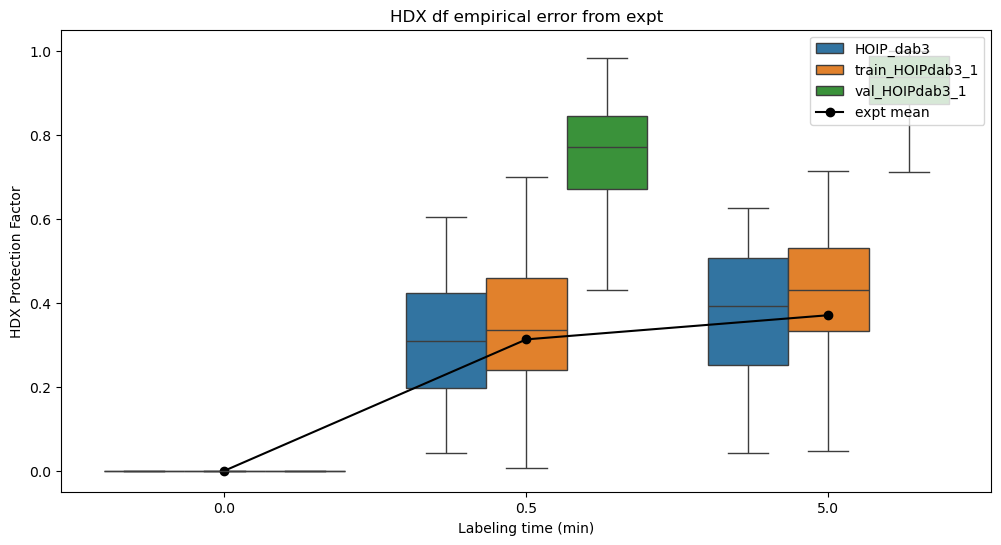

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


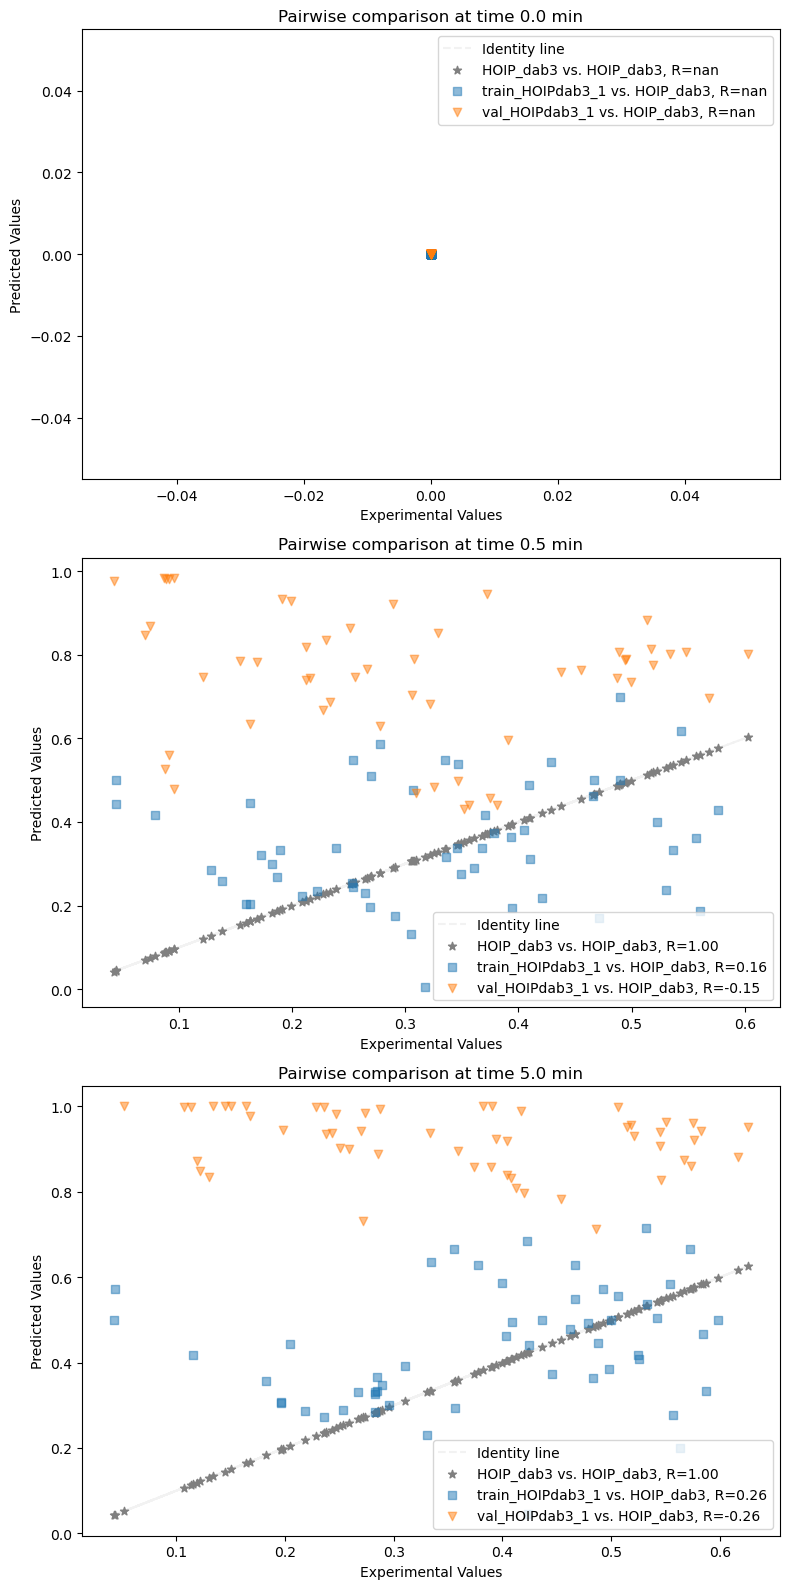

plotting paired trainval agreement
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN  

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries i

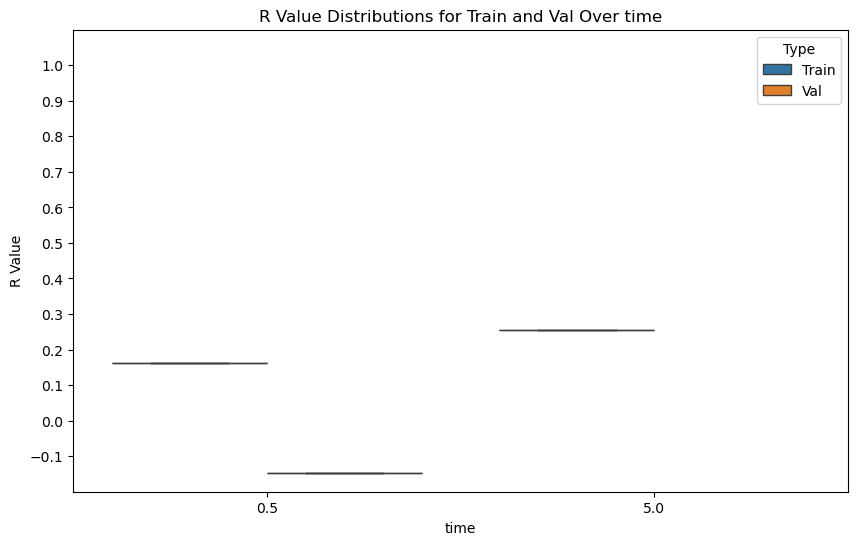

nan_df
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.538780  0.684580       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.400670  0.466500       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.489070  0.500000        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.444260  0.444440       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.237540  0.277080       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.547650  0.636310       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.315420  0.461300       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.333250  0.333330       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.443740  0.571290       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.698670  0.714290       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.416520  0.416670       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.320500  0.357050       79  train_HOIPdab3_1     NaN     NaN   
12   0.0  0.500000

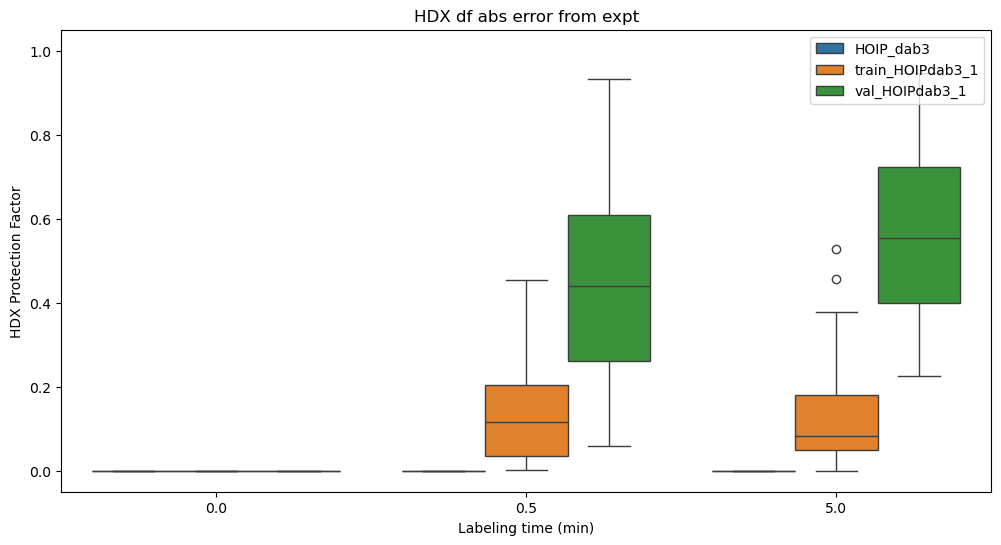

plot_dfracs_compare_MSE
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.538780  0.684580       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.400670  0.466500       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.489070  0.500000        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.444260  0.444440       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.237540  0.277080       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.547650  0.636310       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.315420  0.461300       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.333250  0.333330       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.443740  0.571290       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.698670  0.714290       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.416520  0.416670       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.320500  0.357050       79  train_HOIPdab3_1     NaN     NaN   
1

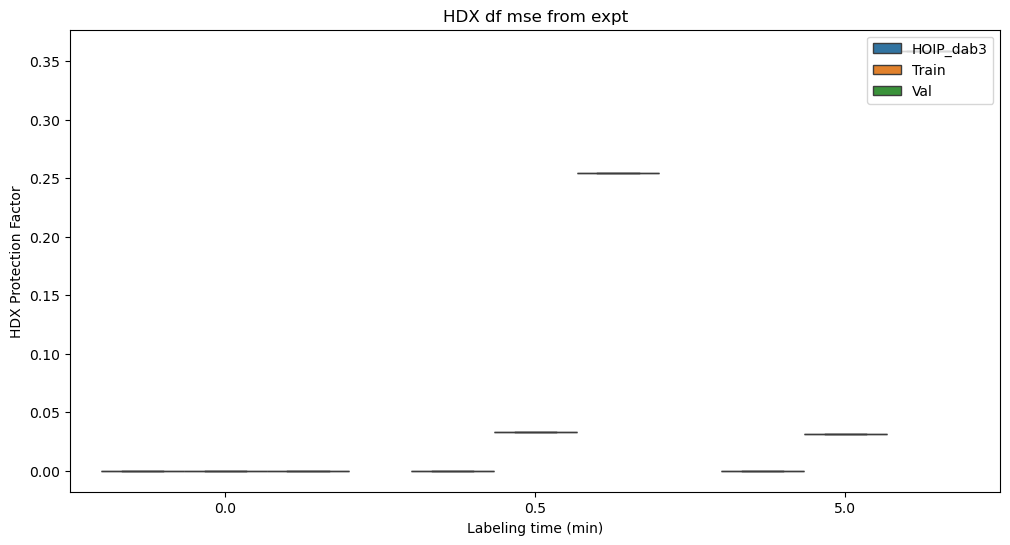

Saving experiment to:  logs/random_HOIPdab3_test2_1706630818.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name sequential_HOIPdab3_test already exists. Attempting to change name to sequential_HOIPdab3_test0
Experiment name sequential_HOIPdab3_test already exists. Attempting to change name to sequential_HOIPdab3_test1
Experiment name sequential_HOIPdab3_test already exists. Attempting to change name to sequential_HOIPdab3_test2
Preparing HDX data for HOIP_dab3
Path /home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat
AVG: ncol = 5, len(names) = 3
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  HOIP_dab3        False   
1                                                NaN  HOIP_dab3        Fals

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/APO_dab3_6SC6_1-nojump_reordered.xtc -p /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/calc_hdx_train_HOIPdab3_1.log -out /home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1 -seg /home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt -mopt "{ 'save_detailed' : True }" --times 0.0 0.5 5.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
HOIP_dab3 HOIPdab3 True 1
/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1
/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat
REWIGHTING train_HOIPdab3_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/sequential_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat', 'times': [0.0, 0.5, 5.0], 're

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Recalculating val_HOIPdab3_1
    ResStr  ResEnd  peptide                                               path
0      132     150       54  /home/alexi/Documents/ValDX/data/sequential_HO...
1      132     153       55  /home/alexi/Documents/ValDX/data/sequential_HO...
2      150     169       56  /home/alexi/Documents/ValDX/data/sequential_HO...
3      151     162       57  /home/alexi/Documents/ValDX/data/sequential_HO...
4      151     167       58  /home/alexi/Documents/ValDX/data/sequential_HO...
5      151     169       59  /home/alexi/Documents/ValDX/data/sequential_HO...
6      151     170       60  /home/alexi/Documents/ValDX/data/sequential_HO...
7      154     169       61  /home/alexi/Documents/ValDX/data/sequential_HO...
8      155     169       62  /home/alexi/Documents/ValDX/data/sequential_HO...
9      169     183       63  /home/alexi/Documents/ValDX/data/sequential_HO...
10     170     183       64  /home/alexi/Documents/ValDX/data/sequential_HO...
11     170     185     

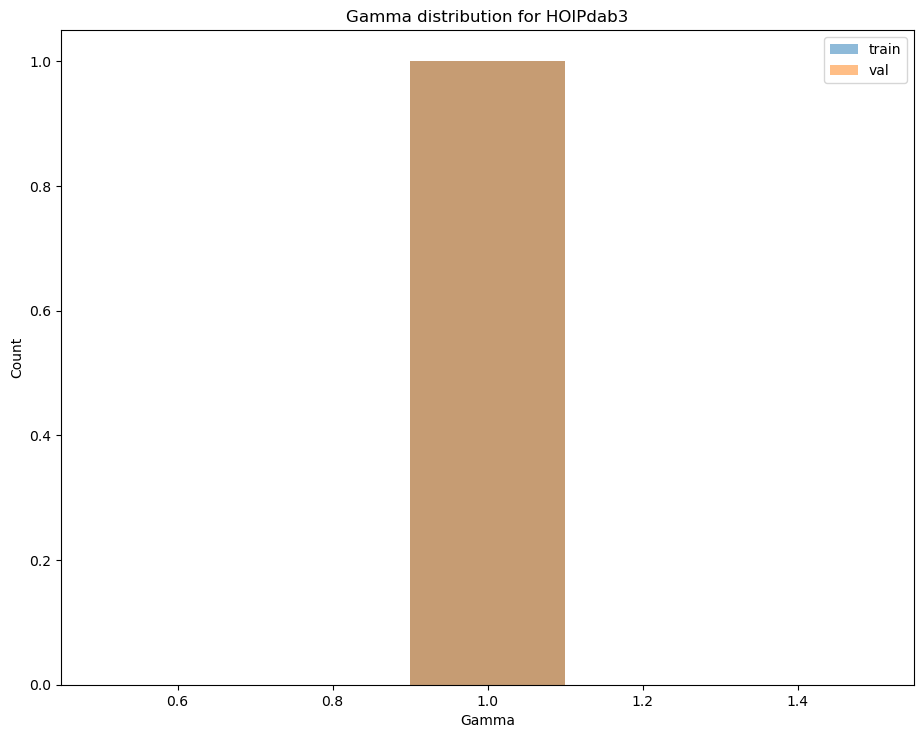

['train_HOIPdab3_1']
['val_HOIPdab3_1']
plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11   

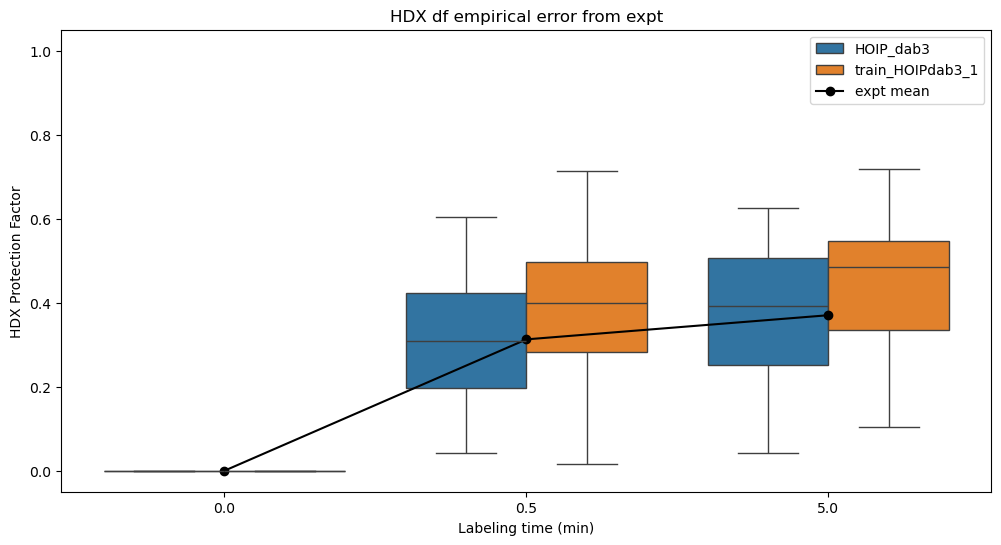

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

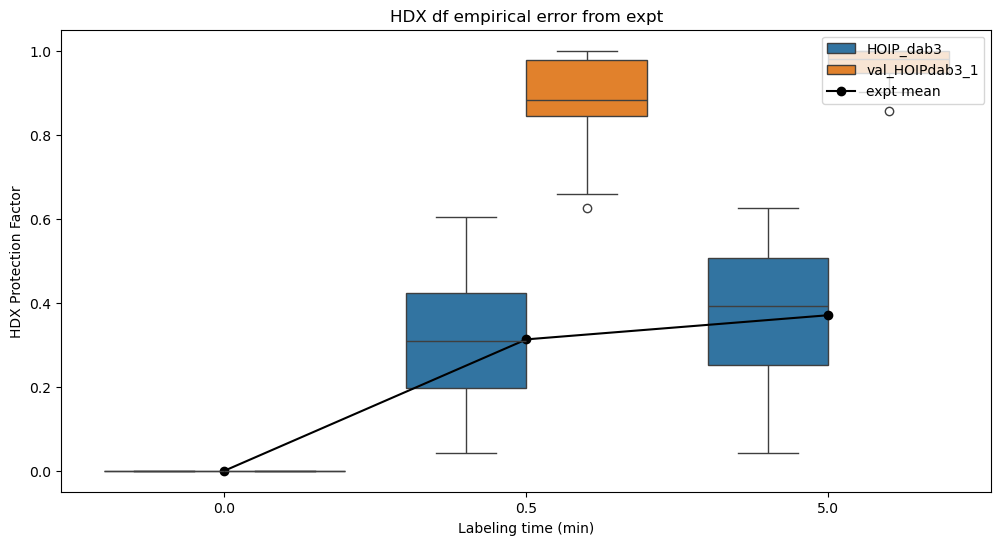

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

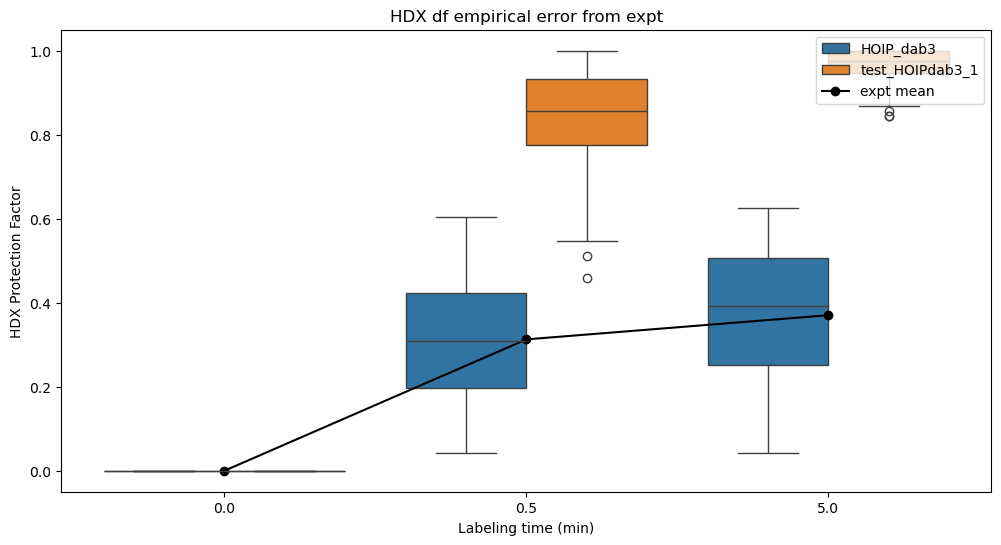

train_rep_names ['train_HOIPdab3_1']
val_rep_names ['val_HOIPdab3_1']
test_rep_names ['test_HOIPdab3_1']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
val_rep_peptides [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103

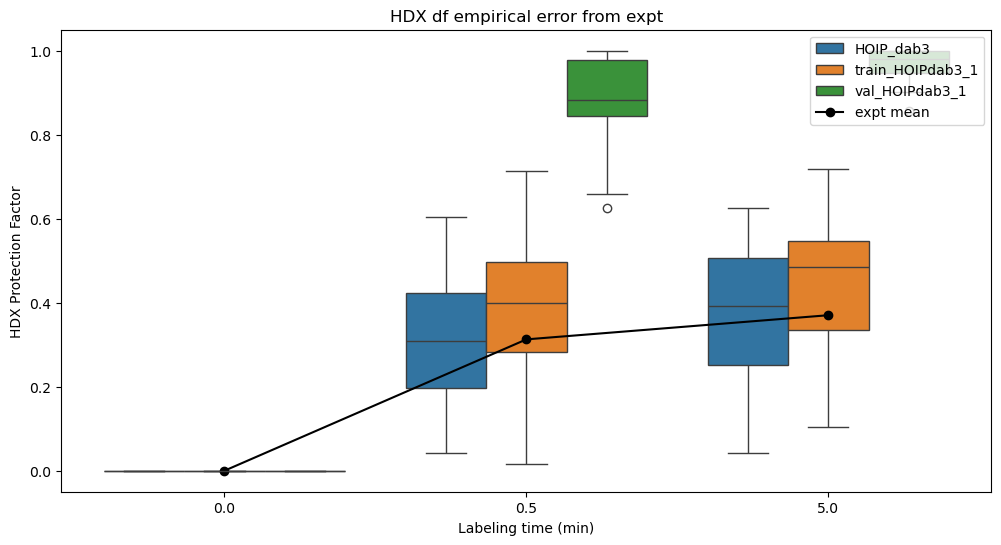

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


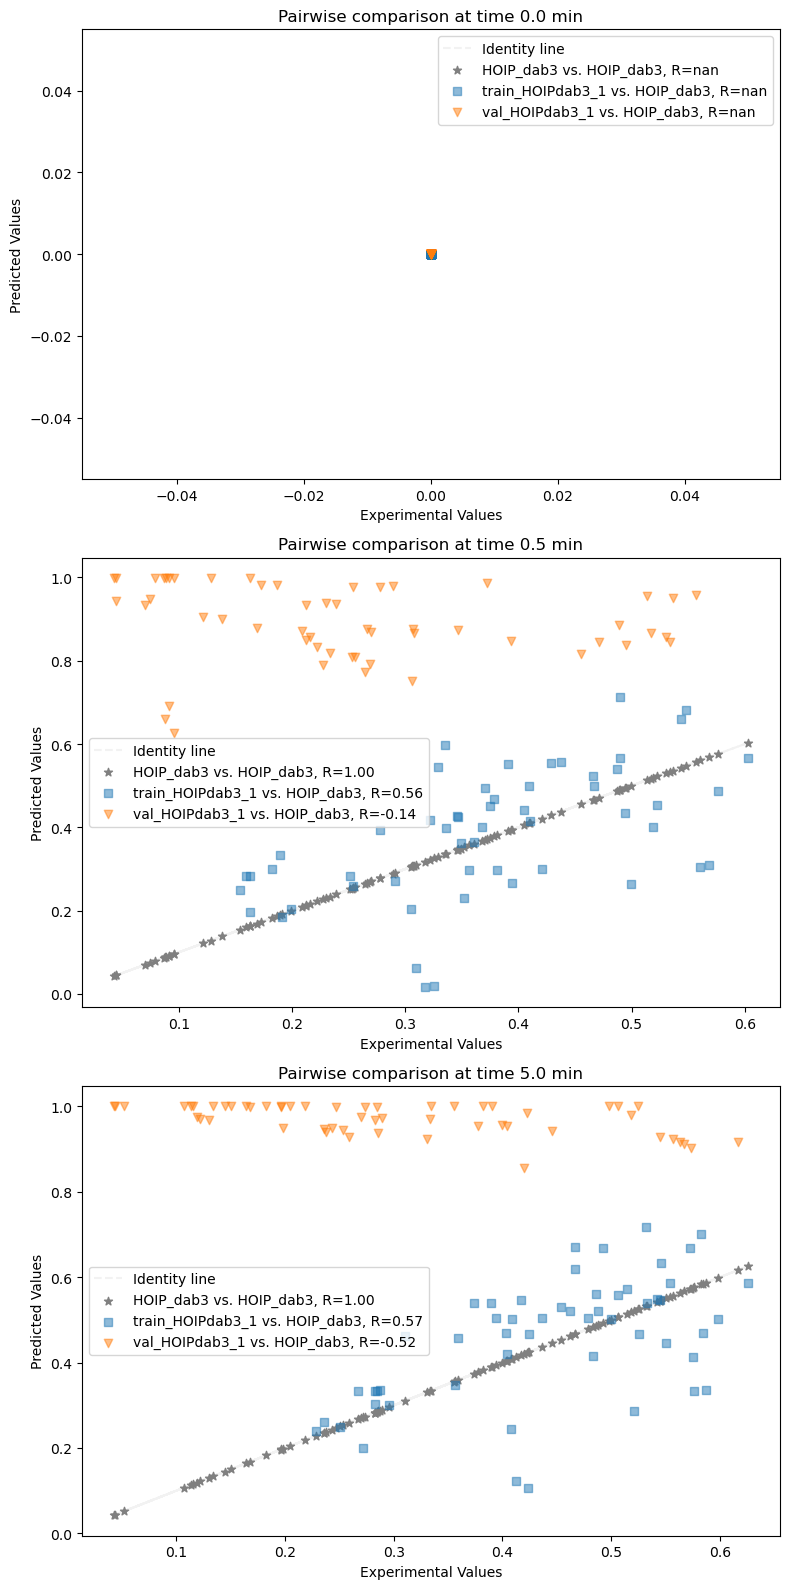

plotting paired trainval agreement
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN  

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries i

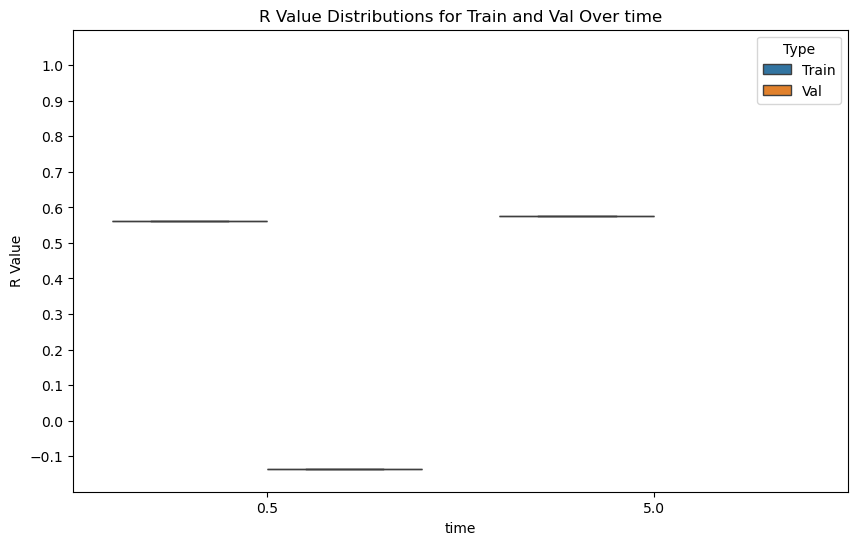

nan_df
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.500480  0.504720        0  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.544500  0.547580        1  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.557820  0.573100        2  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.433970  0.446810        3  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.498950  0.502340        4  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.523810  0.540260        5  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.400670  0.414270        6  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.554390  0.558150        7  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.540250  0.547580        8  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.567460  0.585280        9  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.454070  0.469290       10  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.712780  0.717550       11  train_HOIPdab3_1     NaN     NaN   
12   0.0  0.660290

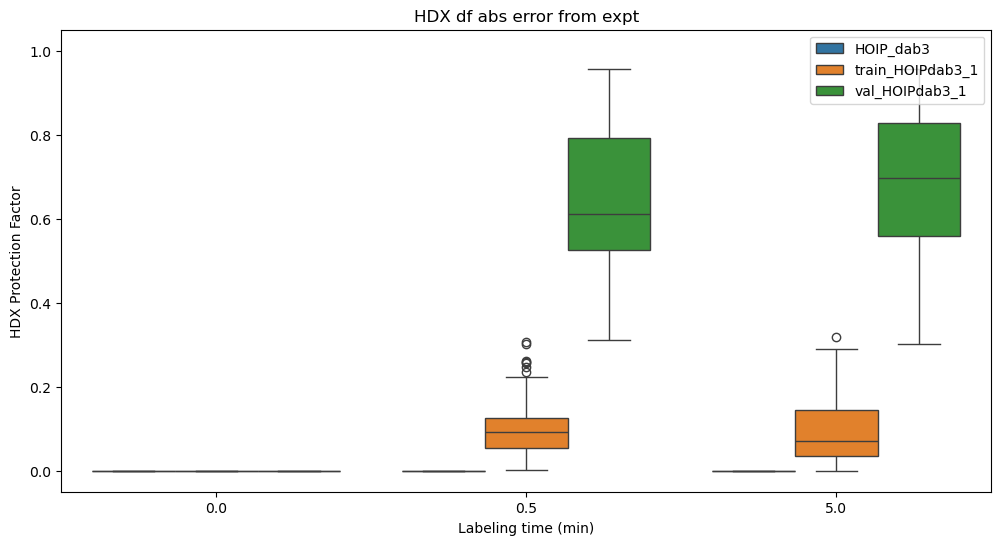

plot_dfracs_compare_MSE
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.500480  0.504720        0  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.544500  0.547580        1  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.557820  0.573100        2  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.433970  0.446810        3  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.498950  0.502340        4  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.523810  0.540260        5  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.400670  0.414270        6  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.554390  0.558150        7  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.540250  0.547580        8  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.567460  0.585280        9  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.454070  0.469290       10  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.712780  0.717550       11  train_HOIPdab3_1     NaN     NaN   
1

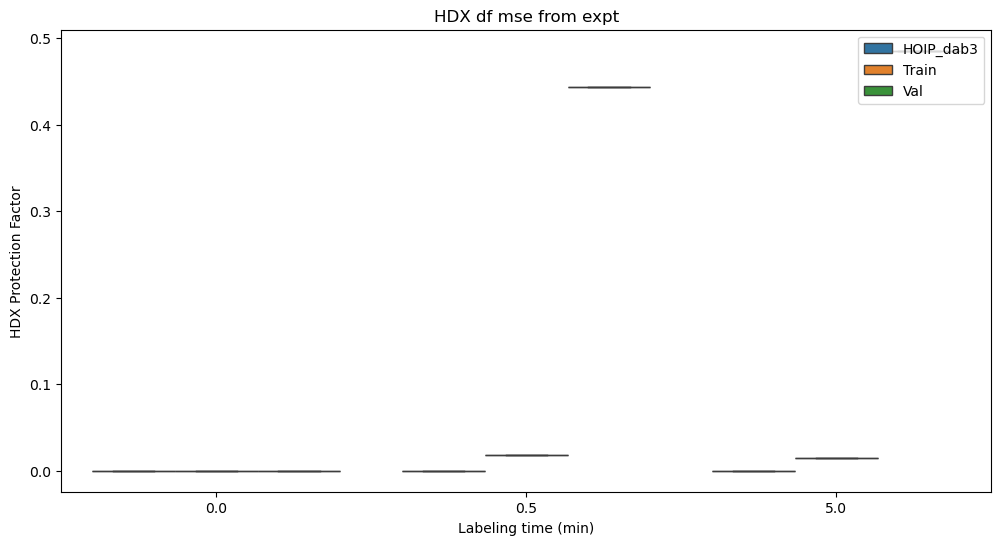

Saving experiment to:  logs/sequential_HOIPdab3_test2_1706630843.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name redundancy_HOIPdab3_test already exists. Attempting to change name to redundancy_HOIPdab3_test0
Experiment name redundancy_HOIPdab3_test already exists. Attempting to change name to redundancy_HOIPdab3_test1
Experiment name redundancy_HOIPdab3_test already exists. Attempting to change name to redundancy_HOIPdab3_test2
Preparing HDX data for HOIP_dab3
Path /home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat
AVG: ncol = 5, len(names) = 3
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  HOIP_dab3        False   
1                                                NaN  HOIP_dab3        Fals

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/APO_dab3_6SC6_1-nojump_reordered.xtc -p /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/calc_hdx_train_HOIPdab3_1.log -out /home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1 -seg /home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt -mopt "{ 'save_detailed' : True }" --times 0.0 0.5 5.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
HOIP_dab3 HOIPdab3 True 1
/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1
/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat
REWIGHTING train_HOIPdab3_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/redundancy_HOIPdab3_test2/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat', 'times': [0.0, 0.5, 5.0], 're

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Recalculating val_HOIPdab3_1
    ResStr  ResEnd  peptide                                               path
0        1       7        0  /home/alexi/Documents/ValDX/data/redundancy_HO...
1        6      18        1  /home/alexi/Documents/ValDX/data/redundancy_HO...
2        6      21        2  /home/alexi/Documents/ValDX/data/redundancy_HO...
3        7      25        6  /home/alexi/Documents/ValDX/data/redundancy_HO...
4        8      24       10  /home/alexi/Documents/ValDX/data/redundancy_HO...
5       11      20       12  /home/alexi/Documents/ValDX/data/redundancy_HO...
6       11      21       13  /home/alexi/Documents/ValDX/data/redundancy_HO...
7       26      33       18  /home/alexi/Documents/ValDX/data/redundancy_HO...
8       27      33       19  /home/alexi/Documents/ValDX/data/redundancy_HO...
9       33      40       20  /home/alexi/Documents/ValDX/data/redundancy_HO...
10      34      40       21  /home/alexi/Documents/ValDX/data/redundancy_HO...
11      34      41     

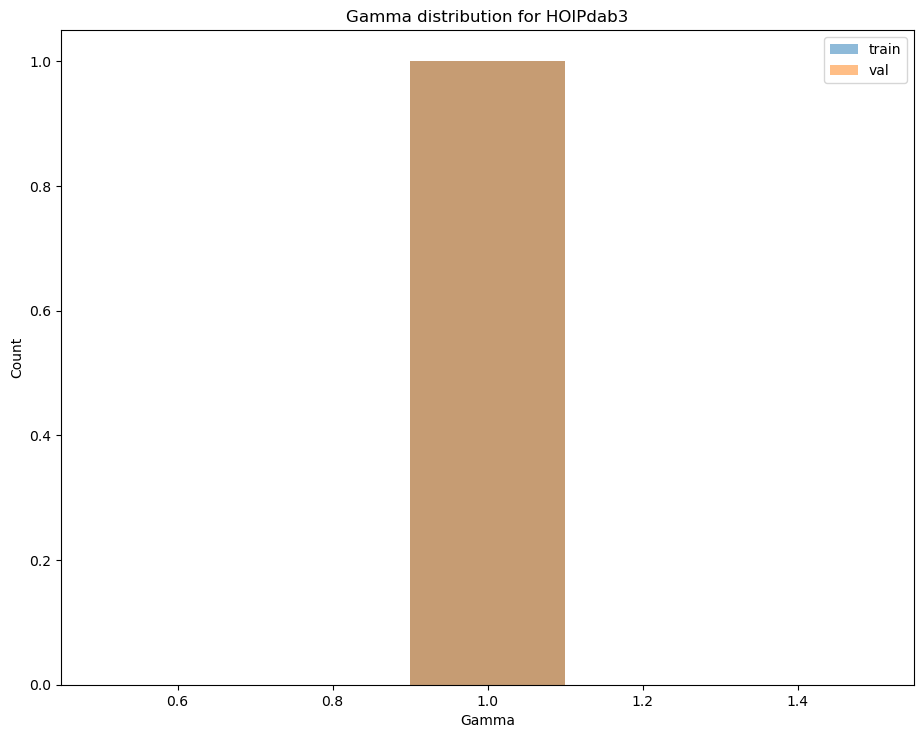

['train_HOIPdab3_1']
['val_HOIPdab3_1']
plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11   

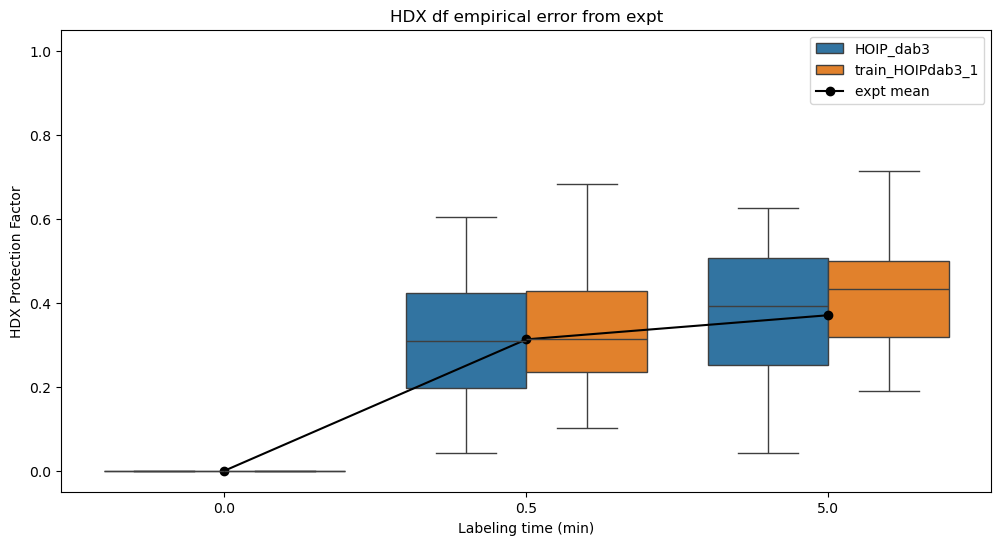

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

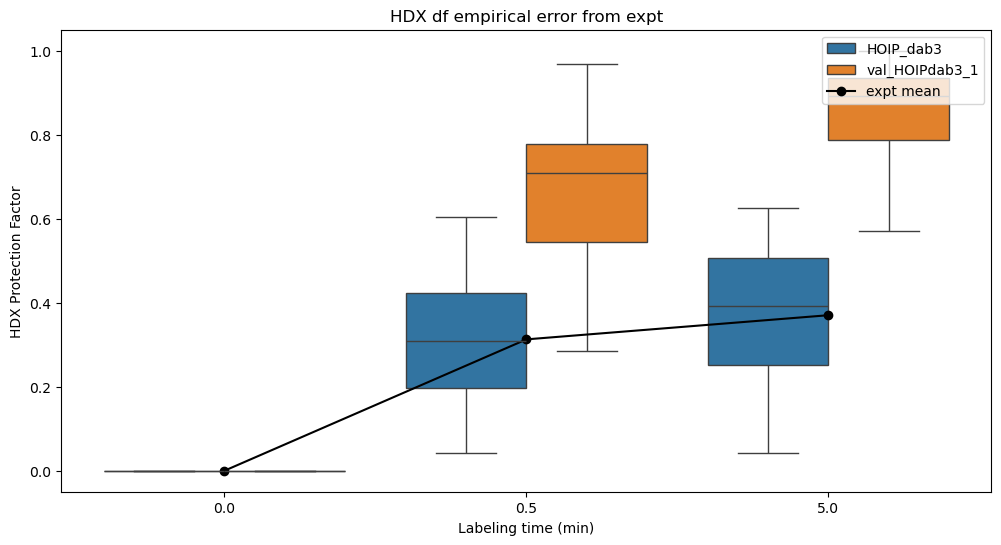

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

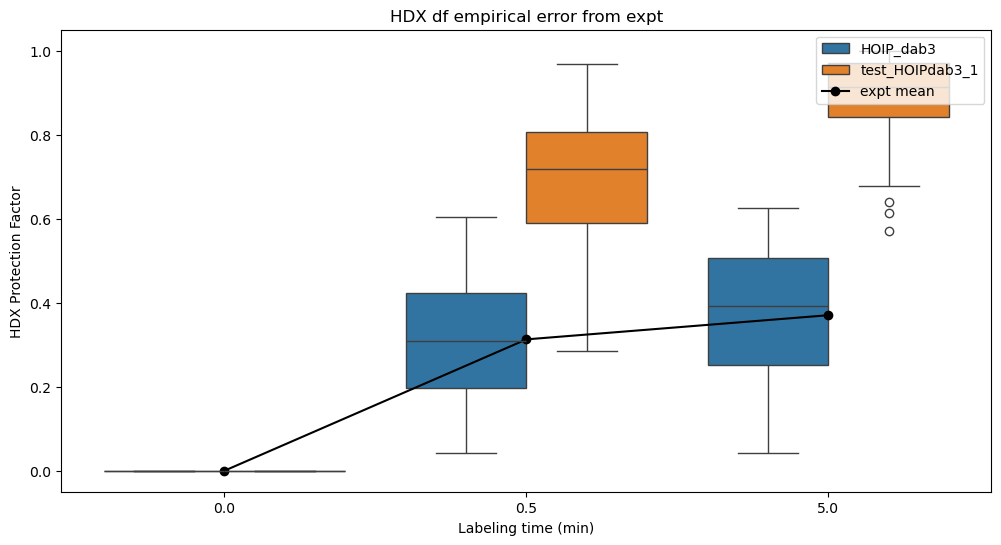

train_rep_names ['train_HOIPdab3_1']
val_rep_names ['val_HOIPdab3_1']
test_rep_names ['test_HOIPdab3_1']
train_rep_peptides [3, 4, 5, 7, 8, 9, 11, 14, 15, 16, 17, 24, 25, 26, 30, 31, 32, 33, 35, 36, 38, 41, 47, 49, 52, 60, 62, 64, 67, 70, 71, 73, 74, 76, 77, 78, 80, 81, 84, 86, 88, 89, 90, 91, 92, 94, 96, 98, 99, 100, 105, 106, 107]
val_rep_peptides [0, 1, 2, 6, 10, 12, 13, 18, 19, 20, 21, 22, 23, 27, 28, 29, 34, 37, 39, 40, 42, 43, 44, 45, 46, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 63, 65, 66, 68, 69, 72, 75, 79, 82, 83, 85, 87, 93, 95, 97, 101, 102, 103, 104]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103

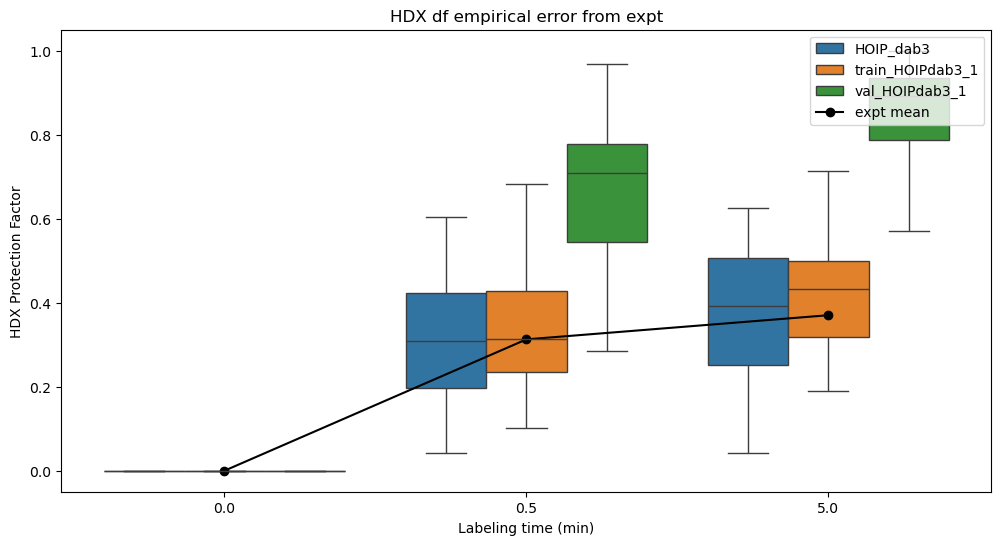

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


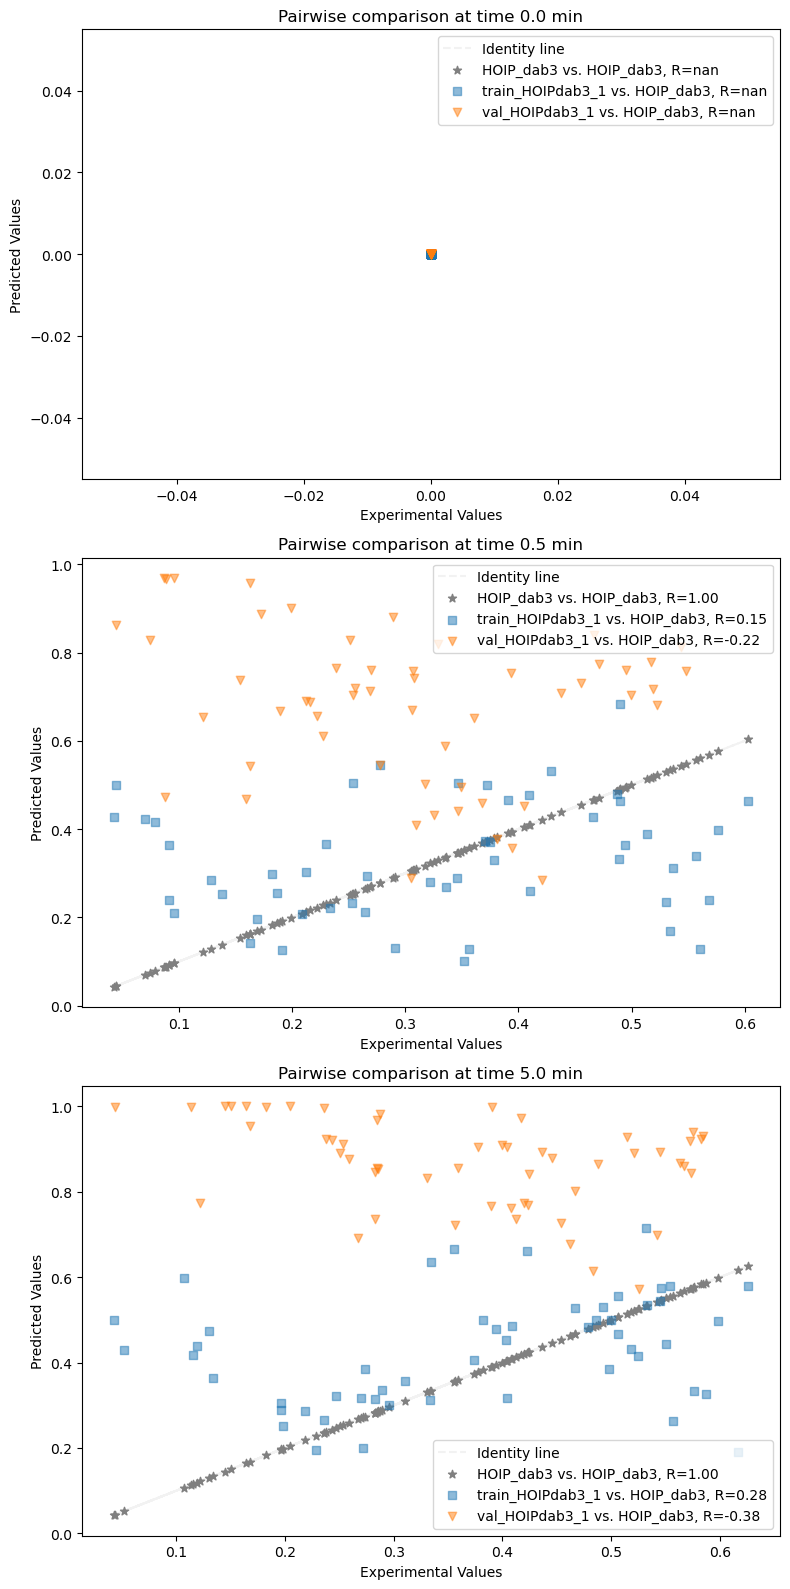

plotting paired trainval agreement
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN  

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries i

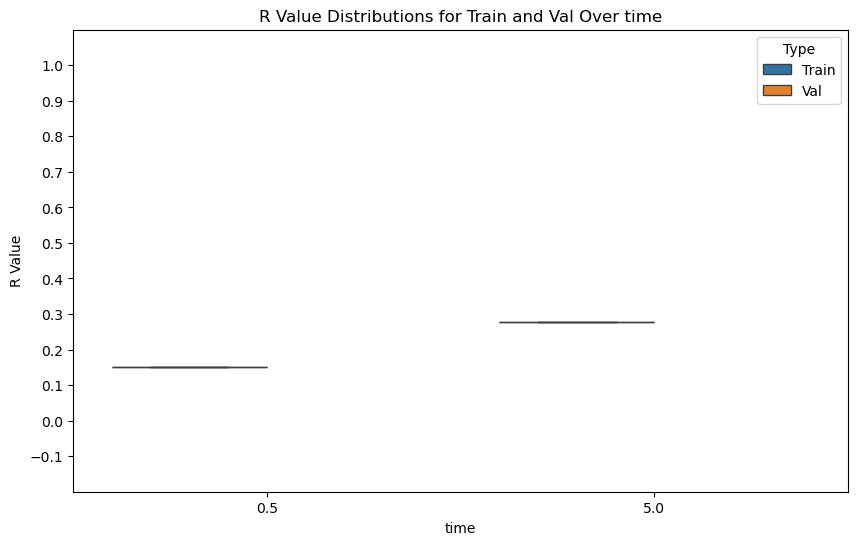

nan_df
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.364370  0.442450        3  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.478240  0.500000        4  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.427590  0.535710        5  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.531380  0.555560        7  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.479380  0.545350        8  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.463230  0.580350        9  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.683200  0.714290       11  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.463230  0.580350       14  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.397050  0.497440       15  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.129390  0.327360       16  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.142970  0.200000       17  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.129300  0.407030       24  train_HOIPdab3_1     NaN     NaN   
12   0.0  0.100560

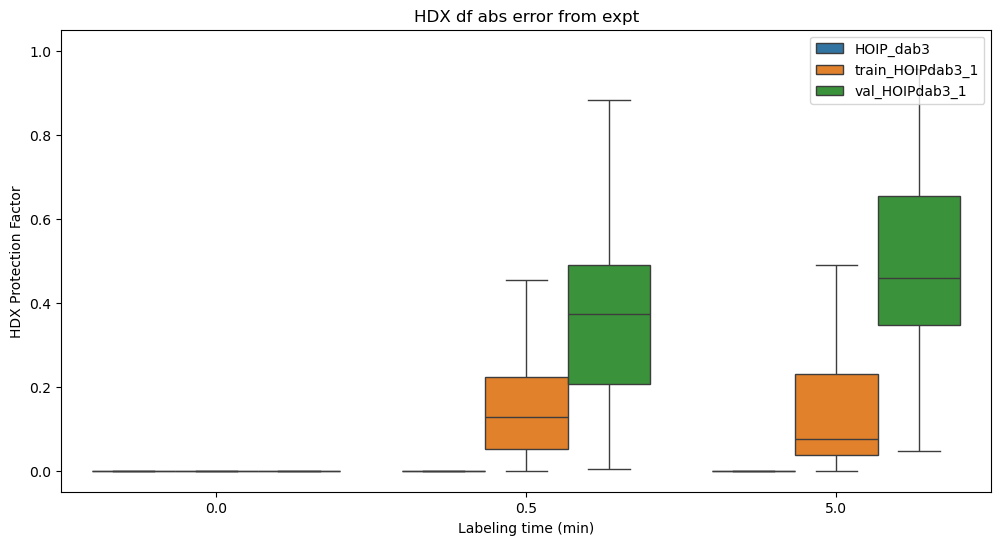

plot_dfracs_compare_MSE
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.364370  0.442450        3  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.478240  0.500000        4  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.427590  0.535710        5  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.531380  0.555560        7  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.479380  0.545350        8  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.463230  0.580350        9  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.683200  0.714290       11  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.463230  0.580350       14  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.397050  0.497440       15  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.129390  0.327360       16  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.142970  0.200000       17  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.129300  0.407030       24  train_HOIPdab3_1     NaN     NaN   
1

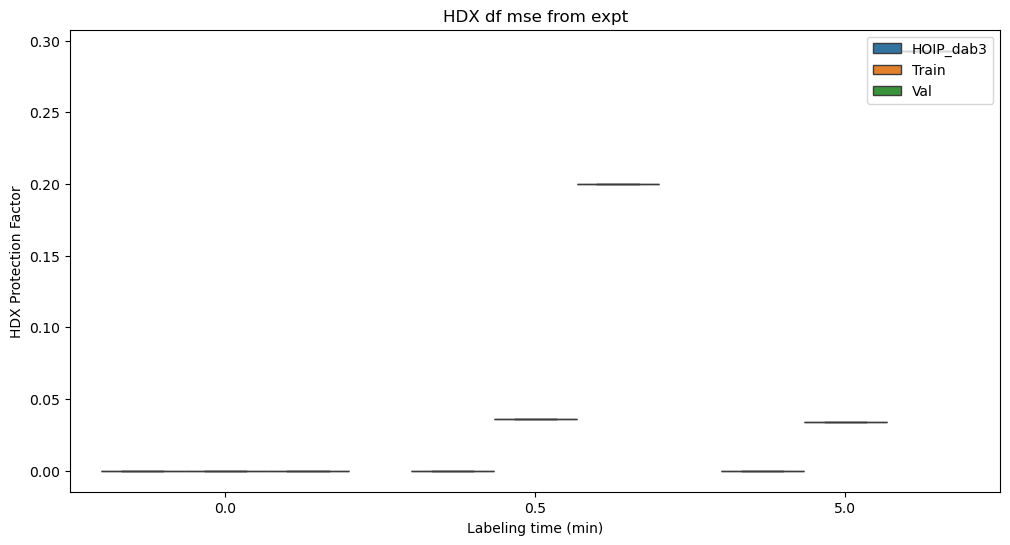

Saving experiment to:  logs/redundancy_HOIPdab3_test2_1706630868.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [8]:

segs_path, hdx_path, rates_path = preprocess_main_HDX()
new_traj_path, renumbered_path = preprocess_main_MD()

splits = ['r', 's', 'R']
split_names = ['random', 'sequential', 'redundancy']
system = 'HOIPdab3_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps[name] = analysis_dump[name]
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


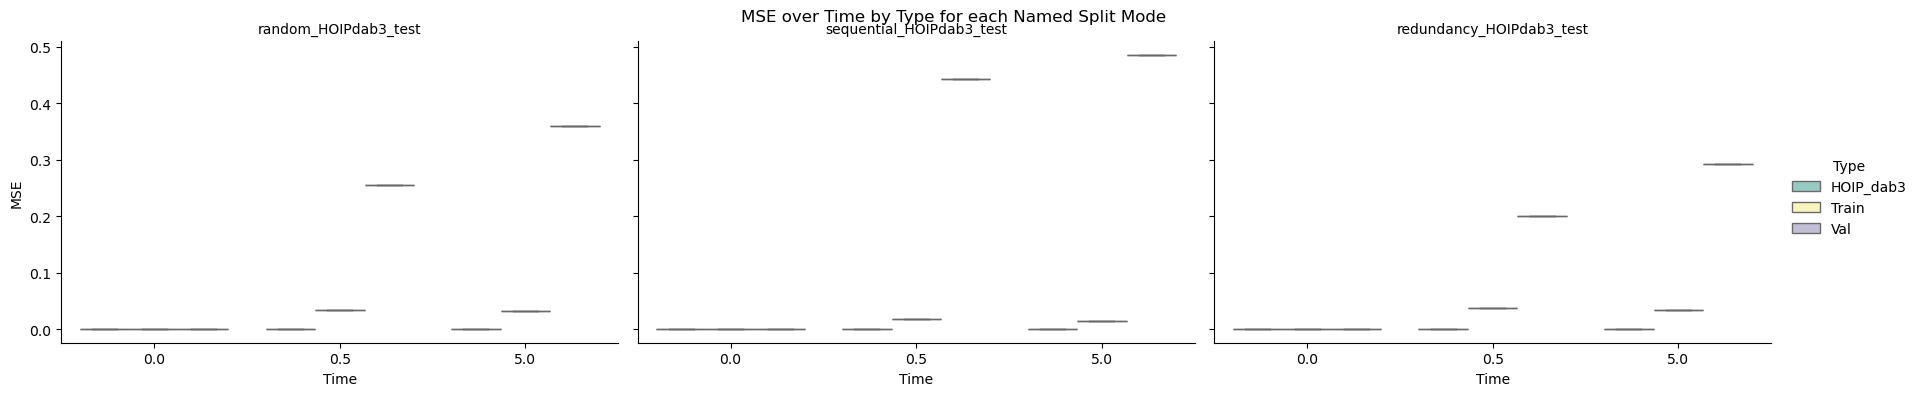

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


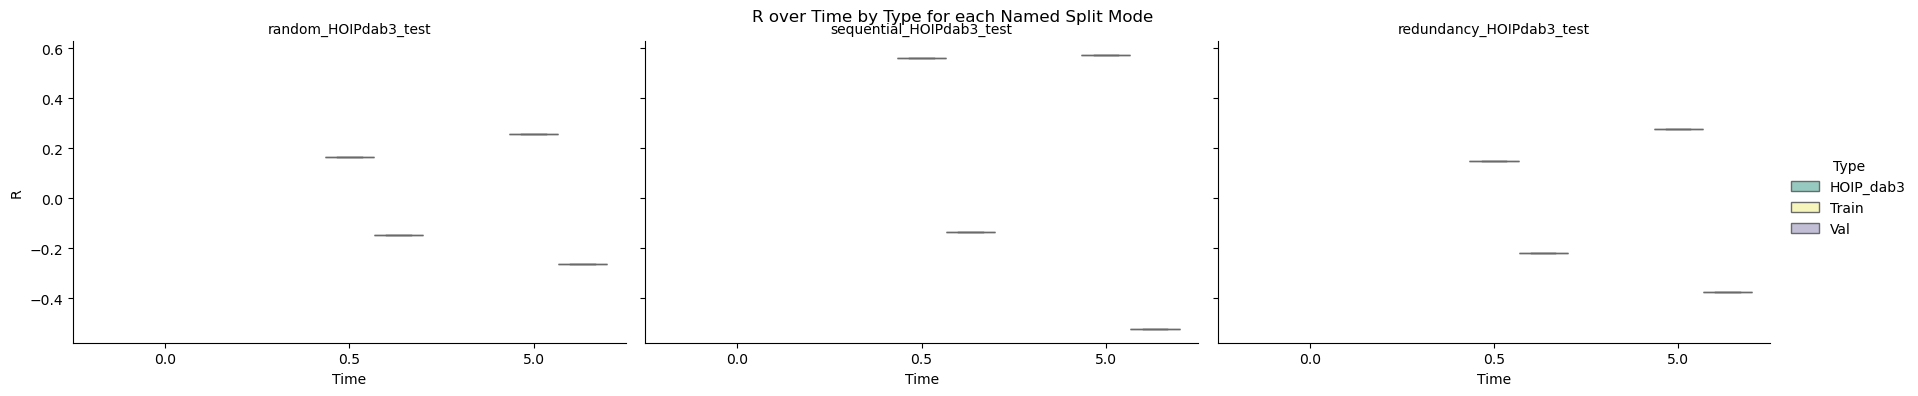

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
